In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

%matplotlib inline

In [16]:
df = pd.read_csv("..\\input\\nba\\2017.csv")
len(df)

1212

In [17]:
df_clean = df[~df.line_team.isna()]
len(df_clean)

1197

In [18]:
df_clean.head()

,date,away,away_fgm,away_fga,away_tpm,away_tpa,away_ftm,away_fta,away_oreb,away_dreb,...,home_oreb,home_dreb,home_assists,home_steals,home_blocks,home_turnovers,home_fouls,home_points,line_team,line_spread
0,2017-10-17 00:00:00,bos,36,88,8,32,19,25,9,37,...,9,41,19,3,4,17,25,102,cle,-4.5
1,2017-10-17 00:00:00,hou,47,97,15,41,13,19,10,33,...,6,35,34,5,9,17,25,121,gsw,-9.5
2,2017-10-18 00:00:00,mil,38,76,7,21,25,30,6,39,...,11,32,23,12,2,12,27,100,bos,-1.5
3,2017-10-18 00:00:00,atl,48,94,9,18,12,15,14,36,...,9,32,27,5,4,15,19,111,dal,-5.5
4,2017-10-18 00:00:00,cho,29,73,9,30,23,29,3,44,...,9,38,24,14,3,8,21,102,det,-2.5


In [19]:
def get_winner(row):
    if row.away_points > row.home_points:
        return row.away
    else:
        return row.home
    
def is_line_correct(row):
    if row.winner != row.line_team:
        return False
    
    real_diff = abs(row.away_points - row.home_points)
    pred_diff = abs(row.line_spread)
    
    return real_diff >= pred_diff
    
df_clean["winner"] = df_clean.apply(get_winner, axis=1)
df_clean["line_correct"] = df_clean.apply(is_line_correct, axis=1)
df_clean["diff"] = (df_clean.away_points - df_clean.home_points).apply(lambda x: abs(x))
df_clean["line_spread"] = df_clean.line_spread.apply(lambda x: abs(x))

C:\Users\lsimu\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\lsimu\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\lsimu\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs

In [20]:
df_clean[["away","away_points","home","home_points", "winner", "line_team", "diff", "line_spread", "line_correct"]].head()

,away,away_points,home,home_points,winner,line_team,diff,line_spread,line_correct
0,bos,99,cle,102,cle,cle,3,4.5,False
1,hou,122,gsw,121,hou,gsw,1,9.5,False
2,mil,108,bos,100,mil,bos,8,1.5,False
3,atl,117,dal,111,atl,dal,6,5.5,False
4,cho,90,det,102,det,det,12,2.5,True


In [21]:
df_clean.line_correct.mean()

0.49958228905597324

In [22]:
(df_clean.line_team == df_clean.winner).mean()

0.68337510442773597

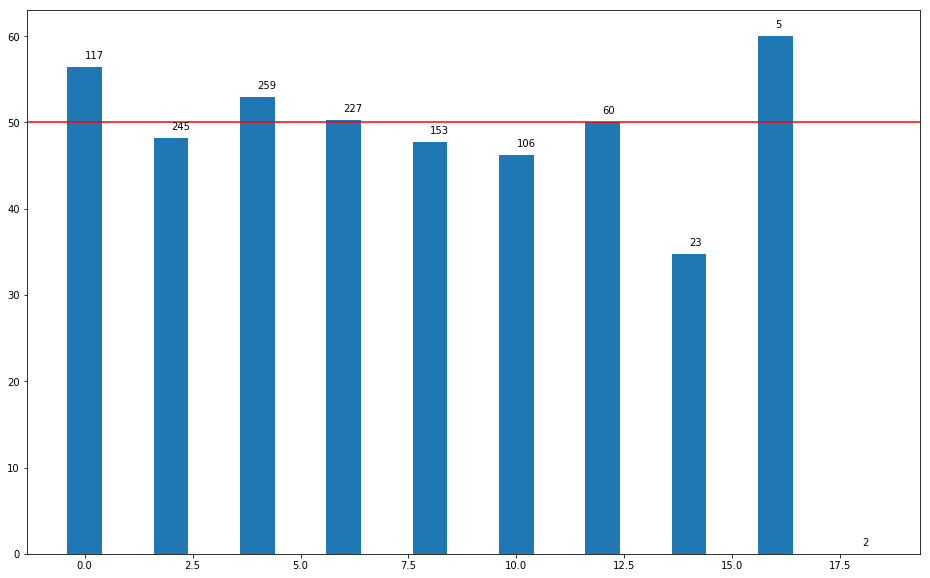

In [23]:
def win_pct(df, b1, b2):
    subset = df[(df.line_spread >= b1) & (df.line_spread < b2)]
    return (subset.line_correct.mean(), len(subset))


pcts = []
xs = []
lengths = []
for x in range(0, 20, 2):
    xs.append(abs(x))
    pct,length = win_pct(df_clean, x, x+2)
    if math.isnan(pct):
        pct = 0
    pcts.append(pct * 100)
    lengths.append(length)
    
plt.figure(figsize=(16,10))
plt.bar(height=pcts, x=xs);

for i, pos in enumerate(xs):
    val = pcts[i]
    plt.text(pos, val + 1, lengths[i])
    
plt.axhline(50, c='r');

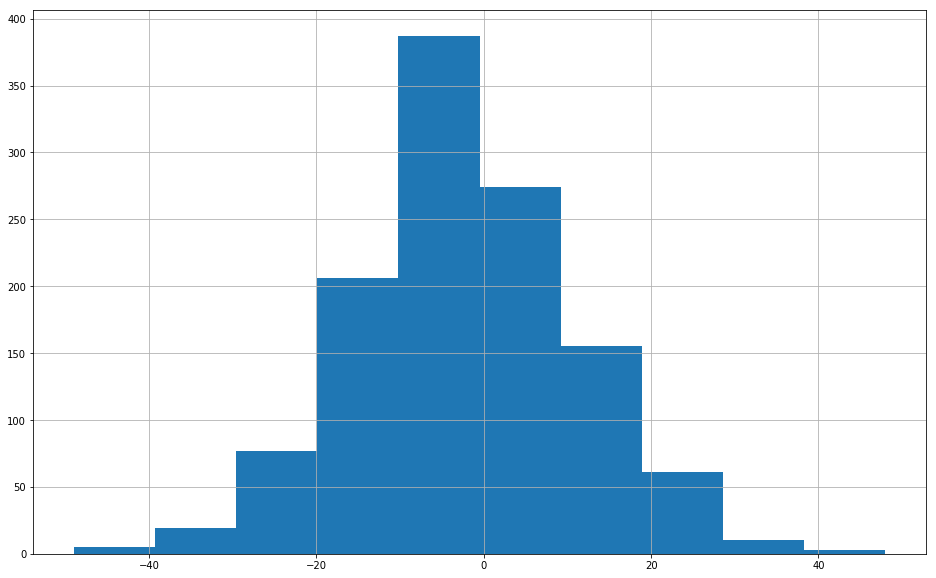

In [224]:
(df_clean["away_points"] - df_clean["home_points"]).hist(figsize=(16,10));

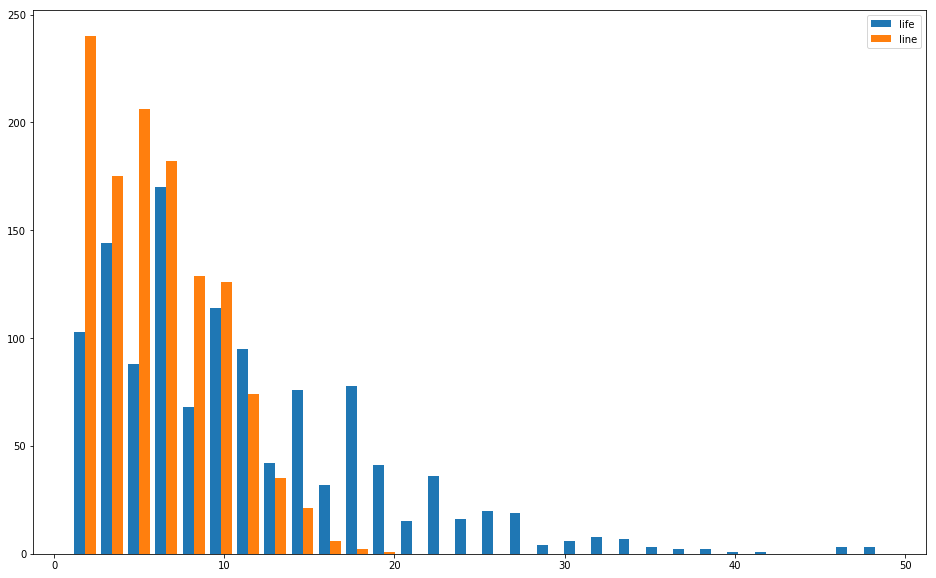

In [24]:
line_spread = df_clean.line_spread
diff_spread = df_clean["diff"]

plt.figure(figsize=(16,10))
plt.hist([diff_spread, line_spread], 30, label=['life', 'line']);
plt.legend(loc='upper right');

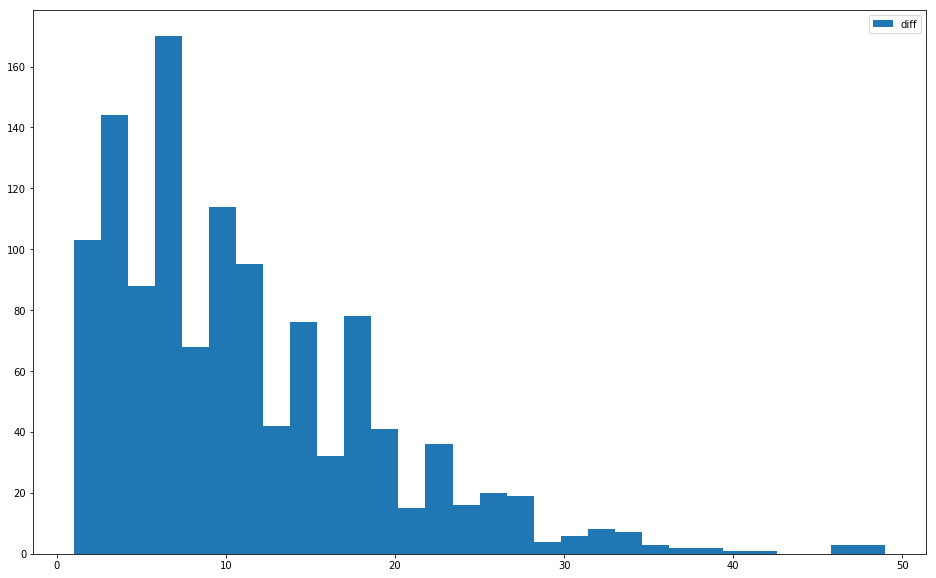

In [98]:
plt.figure(figsize=(16,10))
plt.hist([diff_spread], 30, label=['diff']);
plt.legend(loc='upper right');

- what do histograms look like for cases when lines are wrong
- same as above but for cases when lines are correct